Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



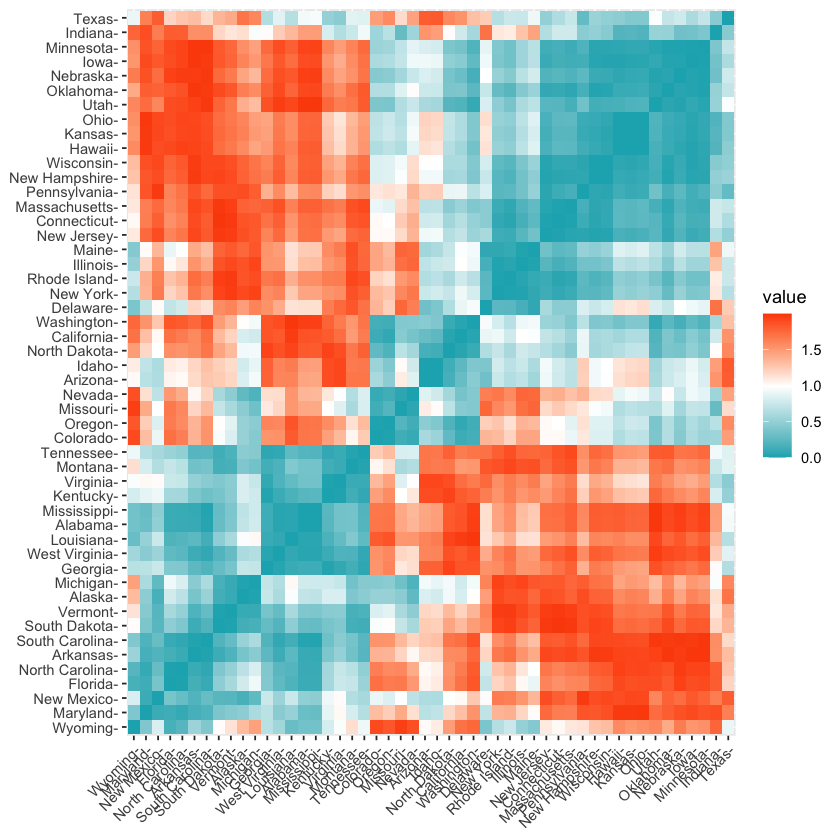

In [2]:
##https://rdrr.io/cran/factoextra/man/dist.html
##https://davetang.org/muse/2013/08/15/distance-matrix-computation/

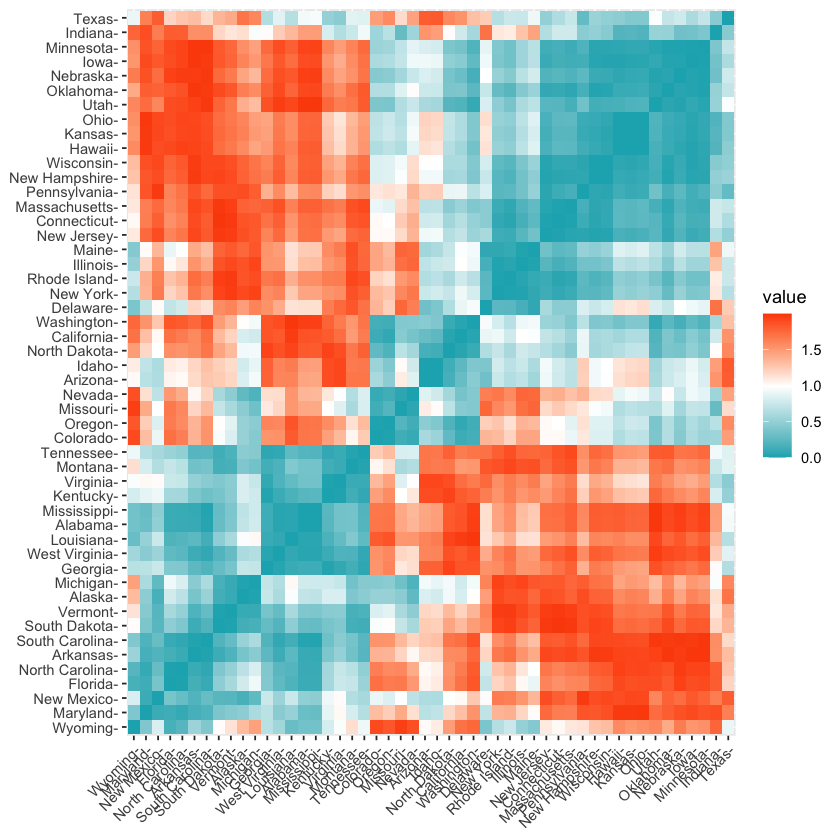

In [3]:
library(factoextra)
data(USArrests)
res.dist <- get_dist(USArrests, stand = TRUE, method = "pearson")

fviz_dist(res.dist, 
   gradient = list(low = "#00AFBB", mid = "white", high = "#FC4E07"))

# Correlation between distance matrices


In [4]:

#install.packages("ade4")
library(ade4)
 
# use the geneData data from Biobase
# install if necessary
#if (!requireNamespace("BiocManager", quietly = TRUE))
 #   install.packages("BiocManager")
 
#BiocManager::install("Biobase")
  
# load the data
data(geneData, package = "Biobase")
 
#transpose to calculate distances for the samples
data <- t(geneData)

In [5]:
# store different distance matrices
eu_dist  <- dist(data, method="euclidean")
max_dist <- dist(data, method="maximum")
man_dist <- dist(data, method="manhattan")
can_dist <- dist(data, method="canberra")
min_dist <- dist(data, method="minkowski", p=1.5)
 
# Euclidean vs. Manhattan
mantel.rtest(eu_dist, man_dist, nrepet=1000)

Monte-Carlo test
Call: mantelnoneuclid(m1 = m1, m2 = m2, nrepet = nrepet)

Observation: 0.889386 

Based on 1000 replicates
Simulated p-value: 0.000999001 
Alternative hypothesis: greater 

     Std.Obs  Expectation     Variance 
 8.480435058 -0.005566867  0.011136894 

In [6]:
# Canberra vs. Manhattan
mantel.rtest(can_dist, man_dist, nrepet=10000)

Monte-Carlo test
Call: mantelnoneuclid(m1 = m1, m2 = m2, nrepet = nrepet)

Observation: 0.5779173 

Based on 10000 replicates
Simulated p-value: 9.999e-05 
Alternative hypothesis: greater 

     Std.Obs  Expectation     Variance 
6.5658061046 0.0003780971 0.0077372549 

In [7]:
# Minkowski vs. Manhattan
mantel.rtest(min_dist, man_dist, nrepet=1000)

Monte-Carlo test
Call: mantelnoneuclid(m1 = m1, m2 = m2, nrepet = nrepet)

Observation: 0.9629646 

Based on 1000 replicates
Simulated p-value: 0.000999001 
Alternative hypothesis: greater 

    Std.Obs Expectation    Variance 
9.708342062 0.003080438 0.009775693 

In [8]:
# Minkowski vs. Euclidian
mantel.rtest(min_dist, eu_dist, nrepet=1000)


Monte-Carlo test
Call: mantelnoneuclid(m1 = m1, m2 = m2, nrepet = nrepet)

Observation: 0.9758106 

Based on 1000 replicates
Simulated p-value: 0.000999001 
Alternative hypothesis: greater 

     Std.Obs  Expectation     Variance 
 8.050097971 -0.004505584  0.014829620 

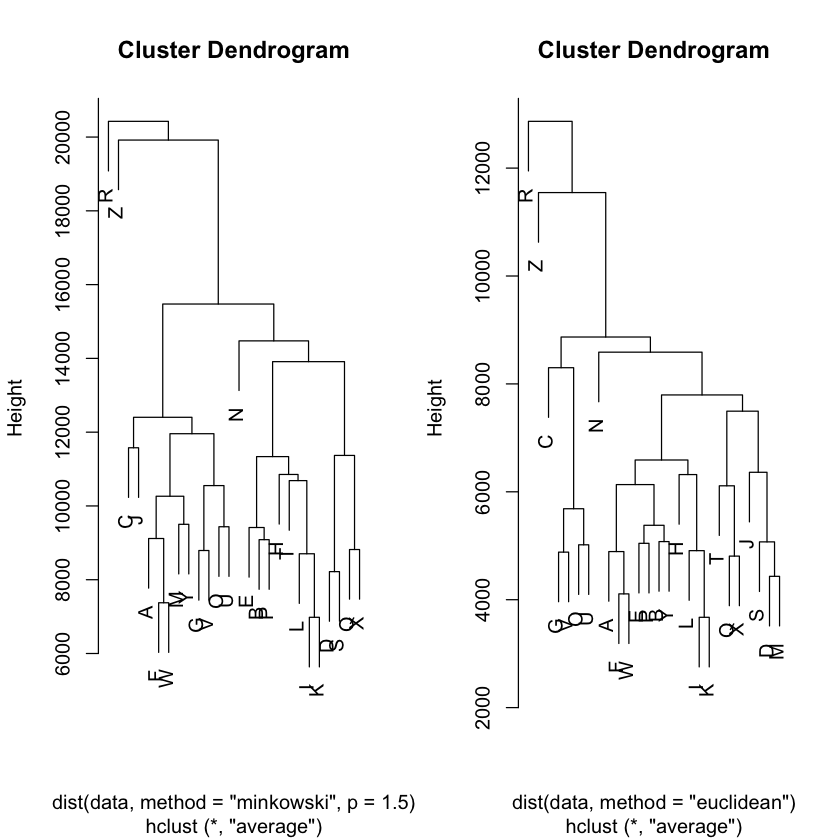

In [9]:
par(mfrow=c(1,2))
plot(hclust(dist(data, method="minkowski", p=1.5),method="average"))
plot(hclust(dist(data, method="euclidean"),method="average"))


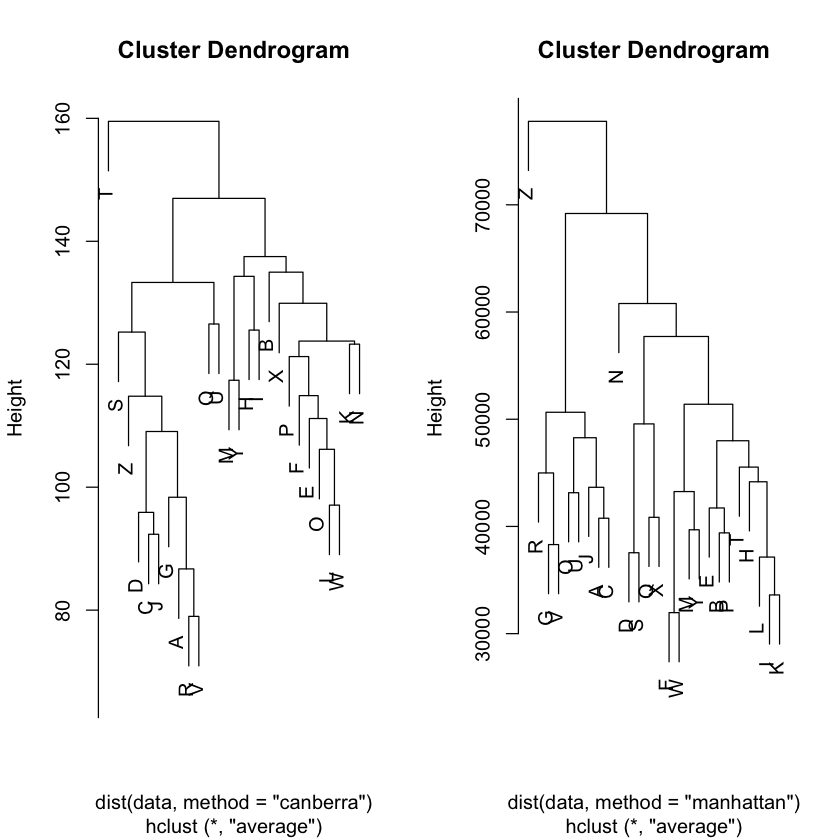

In [10]:
par(mfrow=c(1,2))
plot(hclust(dist(data, method="canberra"),method="average"))
plot(hclust(dist(data, method="manhattan"),method="average"))


In [11]:
# set seed to make example reproducible
set.seed(123)
test <- data.frame(x=sample(1:10000,7), 
                   y=sample(1:10000,7), 
                   z=sample(1:10000,7))
test

x,y,z
<int>,<int>,<int>
2463,4761,2888
2511,6746,6170
8718,9819,2567
2986,2757,9642
1842,5107,9982
9334,9145,2980
3371,9209,1614


In [14]:
#install.packages("scatterplot3d") # Install
library("scatterplot3d") # load

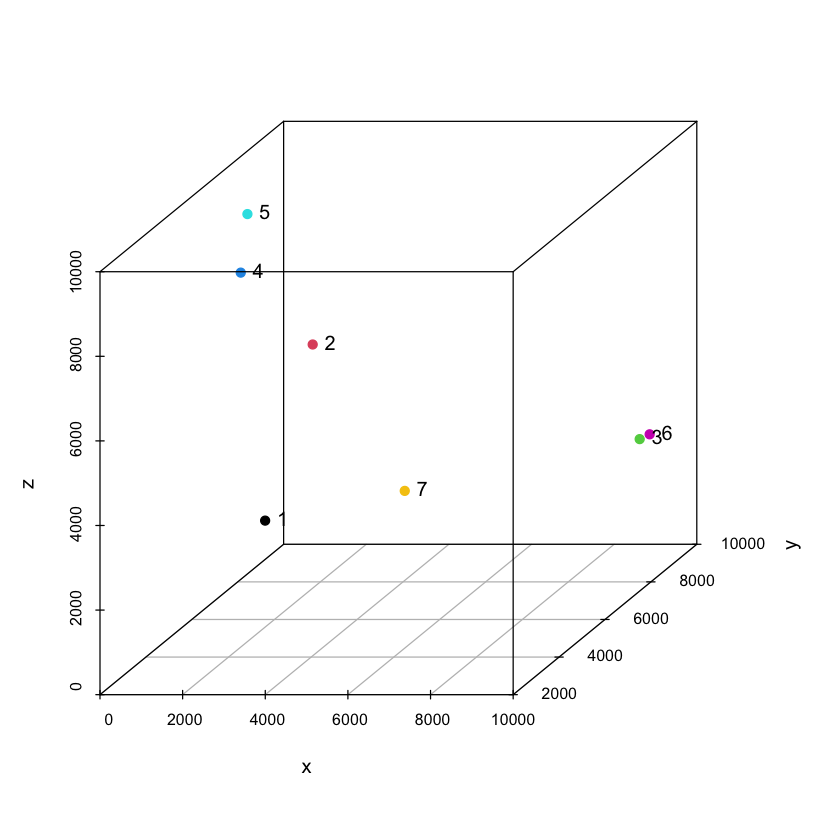

In [15]:
s3d <- scatterplot3d(test, color=1:7, pch=19, type="p")
s3d.coords <- s3d$xyz.convert(test)
text(s3d.coords$x, s3d.coords$y, labels=row.names(test), cex=1, pos=4)


In [16]:
# Euclidean distance in R
euclidean_distance <- function(p,q){
   sqrt(sum((p - q)^2))
}
 
# what is the distance between 1 and 5?
euclidean_distance(1,5)

[1] 4

In [17]:
# all pairwise distances in test
dist(test)

          1         2         3         4         5         6
2  3835.890                                                  
3  8050.555  7807.163                                        
4  7064.422  5309.664 11523.163                              
5  7129.530  4203.002 11156.368  2635.685                    
6  8150.985  7904.722  1002.148 11202.049 11021.049          
7  4715.108  5250.058  5465.411 10306.566  9443.922  6117.795

In [18]:
example_1 <- data.frame(x=c(2,6), y=c(4,6))
example_1

x,y
<dbl>,<dbl>
2,4
6,6


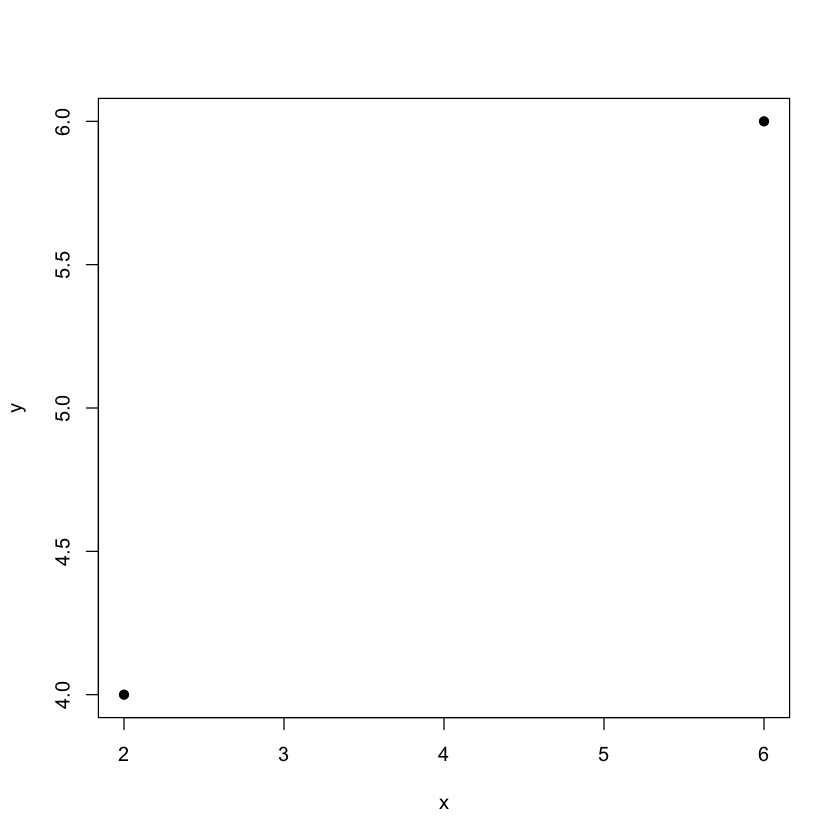

In [19]:
plot(example_1,pch=19)


In [20]:
# Euclidean distance is the hypotenuse
dist(example_1)

         1
2 4.472136

In [21]:
# seems to take the longest edge of the triangle
# that isn't the hypotenuse
dist(example_1, method="maximum")

  1
2 4

In [22]:
# test with 3 coordinates
test[1:2,]

,x,y,z
,<int>,<int>,<int>
1,2463,4761,2888
2,2511,6746,6170


In [23]:
# following the definition above
manhattan_distance <- function(p,q){
  sum(abs(p-q))
}
 
# manhattan distance from 6 to 7
manhattan_distance(test[6,],test[7,])

[1] 7393

In [24]:
dist(test, method="manhattan")


      1     2     3     4     5     6
2  5315                              
3 11634 12883                        
4  9281  7936 19869                  
5  8061  6120 19003  3834            
6 11347 12412  1703 19398 18532      
7  6630  7879  6910 14865 13999  7393

In [25]:
canberra_distance <- function(p,q){
  sum( (abs(p-q)) / (abs(p) + abs(q)) )
}


In [26]:
canberra_distance(test[6,],test[7,])

[1] 0.7701741

In [27]:
dist(test, method="canberra")

          1         2         3         4         5         6
2 0.5444855                                                  
3 0.9651899 1.1506609                                        
4 0.9015675 0.7257530 1.6307834                              
5 0.7305181 0.5279723 1.5577108 0.5531070                    
6 0.9133741 1.0756235 0.1441193 1.5797848 1.4938881          
7 0.7570213 0.8858836 0.7022968 1.3129772 1.3014659 0.7701741

# Clustering based on different distant measures


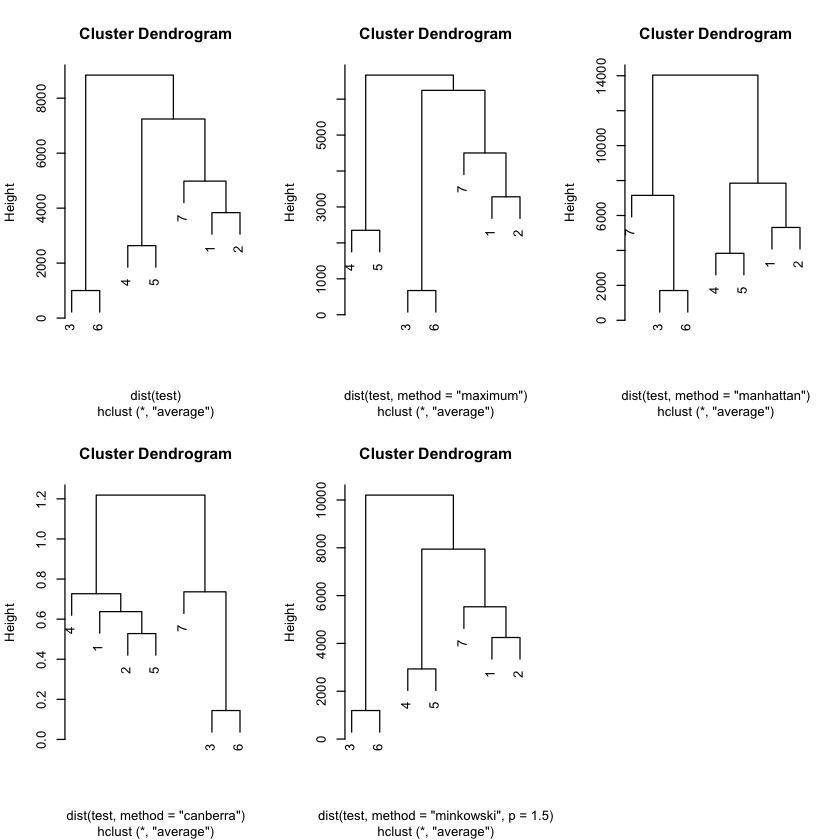

In [28]:
par(mfrow=c(2,3))
plot(hclust(dist(test),method="average"))
plot(hclust(dist(test, method="maximum"),method="average"))
plot(hclust(dist(test, method="manhattan"),method="average"))
plot(hclust(dist(test, method="canberra"),method="average"))
plot(hclust(dist(test, method="minkowski", p=1.5),method="average"))
par(mfrow=c(1,1))


# Distance matrix for binary data

In [30]:
##https://myaseen208.com/agricolae/reference/similarity.html
install.packages("agricolae")


also installing the dependency ‘AlgDesign’





The downloaded binary packages are in
	/var/folders/3f/6pzn2nyn32d7wthyxkzsqyxcdrtvym/T//RtmpmiVZzz/downloaded_packages



Attaching package: ‘agricolae’


The following object is masked from ‘package:factoextra’:

    hcut




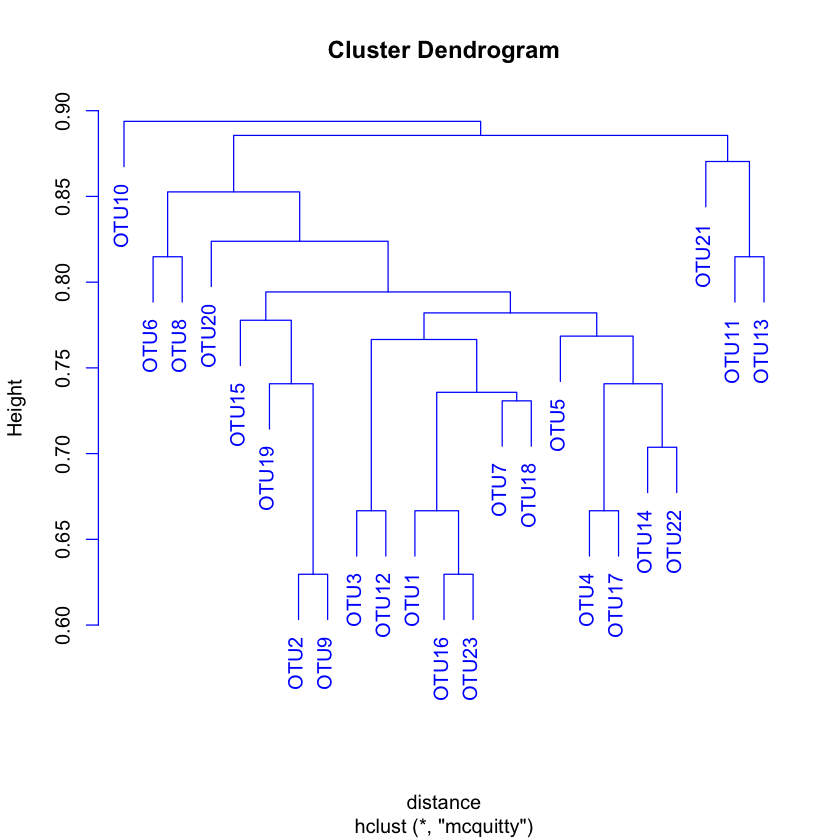

In [31]:
#example table of molecular markers
library(agricolae)
data(markers)
distance<-similarity(markers)
#startgraph
tree<-hclust(distance,method="mcquitty")
plot(tree,col="blue")

           OTU1      OTU2      OTU3      OTU4      OTU5      OTU6      OTU7
OTU2  0.8148148                                                            
OTU3  0.8518519 0.9629630                                                  
OTU4  0.8518519 0.9629630 0.9259259                                        
OTU5  0.7407407 0.7037037 0.7407407 0.7407407                              
OTU6  0.7777778 0.6666667 0.7037037 0.7037037 0.8888889                    
OTU7  0.7692308 0.7307692 0.6923077 0.7692308 0.8076923 0.9230769          
OTU8  0.8148148 0.7777778 0.8148148 0.8148148 0.8518519 0.8148148 0.8076923
OTU9  0.7407407 0.6296296 0.6666667 0.6666667 0.8518519 0.9629630 0.8846154
OTU10 0.7777778 0.6666667 0.7037037 0.7037037 0.8888889 1.0000000 0.9230769
OTU11 0.7777778 0.7407407 0.7777778 0.7777778 0.8888889 0.8518519 0.7692308
OTU12 0.7407407 0.6296296 0.6666667 0.6666667 0.8518519 0.9629630 0.8846154
OTU13 0.8148148 0.7037037 0.7407407 0.7407407 0.8518519 0.9629630 0.9615385
OTU14 0.7777

# Pairwise Hamming distances between matrix rows.


In [34]:
library(cultevo)
# a 2x3 design using integers
print(integers <- matrix(c(0, 0, 0, 1, 0, 2, 1, 0, 1, 1, 1, 2), ncol=2, byrow=TRUE))


     [,1] [,2]
[1,]    0    0
[2,]    0    1
[3,]    0    2
[4,]    1    0
[5,]    1    1
[6,]    1    2


In [35]:
hammingdists(integers)

  1 2 3 4 5
2 1        
3 1 1      
4 1 2 2    
5 2 1 2 1  
6 2 2 1 1 1